<a href="https://colab.research.google.com/github/cbonnin88/Soundstream_Project/blob/main/Sound_stream_popular_actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown as gd
import plotly.graph_objects as go

In [ ]:
url = "https://drive.google.com/uc?id=1mT1mvIkEliFfRP4JPC7dTjrdy412zs1x"
gd.download(url,"Soundstream_user_data.csv",quiet=True)

df_userdata = pd.read_csv('Soundstream_user_data.csv')
df_userdata.head(10)

,user_id,signup_date,action,timestamp,subscription_type,device,monthly_revenue
0,user_635,2024-05-19,upgrade_premium,2024-12-11 9:44:07,premium,mobile,10
1,user_343,2024-05-07,like_song,2024-10-26 21:53:35,free,mobile,0
2,user_185,2024-05-24,like_song,2024-11-17 22:32:06,premium,desktop,10
3,user_613,2024-05-16,logout,2024-11-02 11:43:13,premium,mobile,10
4,user_407,2024-05-20,create_playlist,2024-08-24 8:56:55,premium,mobile,10
5,user_787,2024-05-25,create_playlist,2024-08-31 1:21:19,premium,mobile,10
6,user_161,2024-05-28,upgrade_premium,2024-10-02 15:49:51,premium,desktop,10
7,user_33,2024-05-22,stream_song,2024-09-17 21:22:07,premium,desktop,10
8,user_878,2024-05-04,like_song,2024-11-13 15:40:41,free,mobile,0
9,user_209,2024-05-27,stream_song,2024-12-21 11:00:06,free,desktop,0


In [ ]:
# Describing Sound Streams dataset
df_userdata.describe()

,monthly_revenue
count,10000.000000
mean,5.034000
std,5.000134
min,0.000000
25%,0.000000
50%,10.000000
75%,10.000000
max,10.000000


In [ ]:
# Checking for missing or inconsistent values
df_userdata.isnull().sum()

,0
user_id,0
signup_date,0
action,0
timestamp,0
subscription_type,0
device,0
monthly_revenue,0


In [ ]:
df_userdata.dtypes

,0
user_id,object
signup_date,object
action,object
timestamp,object
subscription_type,object
device,object
monthly_revenue,int64


In [ ]:
# Getting a look at our unique values by column
print(df_userdata['action'].unique())
print(df_userdata['device'].unique())
print(df_userdata['subscription_type'].unique())

['upgrade_premium' 'like_song' 'logout' 'create_playlist' 'stream_song']
['mobile' 'desktop' 'tablet']
['premium' 'free']


# **Popular Actions**

<function matplotlib.pyplot.show(close=None, block=None)>

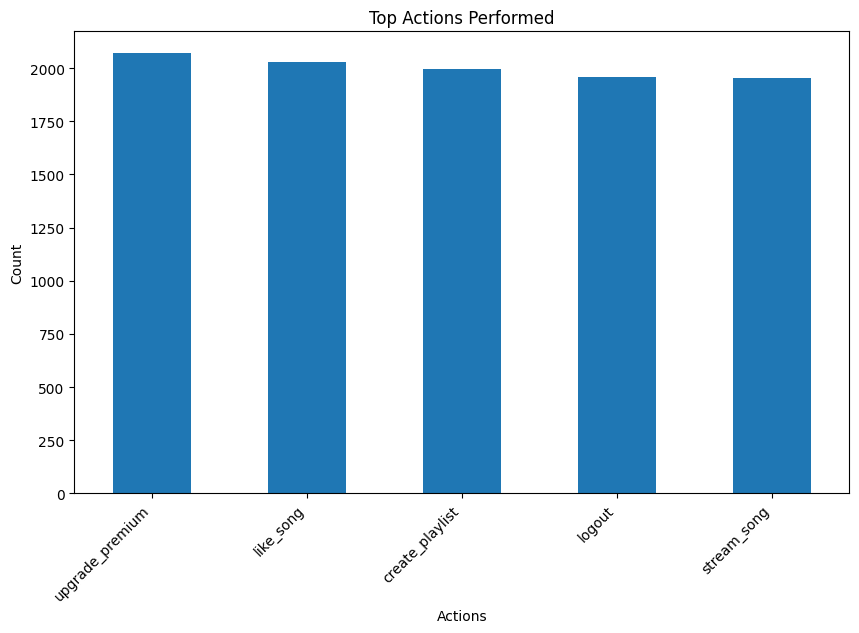

In [ ]:
# Calculating the top actions performed by users
action_counts = df_userdata['action'].value_counts()
action_counts.plot(
    kind='bar',
    figsize=(10,6),
    title="Top Actions Performed"
)
plt.xlabel("Actions")
plt.ylabel("Count")
plt.xticks(rotation=45,
         ha='right' )

plt.show

In [ ]:
# Filtering users actions by subscription type and device
premium_date = df_userdata[df_userdata['subscription_type']== 'premium']

print(premium_date.head())


    user_id signup_date           action            timestamp  \
0  user_635  2024-05-19  upgrade_premium   2024-12-11 9:44:07   
2  user_185  2024-05-24        like_song  2024-11-17 22:32:06   
3  user_613  2024-05-16           logout  2024-11-02 11:43:13   
4  user_407  2024-05-20  create_playlist   2024-08-24 8:56:55   
5  user_787  2024-05-25  create_playlist   2024-08-31 1:21:19   

  subscription_type   device  monthly_revenue  
0           premium   mobile               10  
2           premium  desktop               10  
3           premium   mobile               10  
4           premium   mobile               10  
5           premium   mobile               10  


In [ ]:
mobile_data = df_userdata[df_userdata['device']== 'mobile']
print(mobile_data.head())

    user_id signup_date           action            timestamp  \
0  user_635  2024-05-19  upgrade_premium   2024-12-11 9:44:07   
1  user_343  2024-05-07        like_song  2024-10-26 21:53:35   
3  user_613  2024-05-16           logout  2024-11-02 11:43:13   
4  user_407  2024-05-20  create_playlist   2024-08-24 8:56:55   
5  user_787  2024-05-25  create_playlist   2024-08-31 1:21:19   

  subscription_type  device  monthly_revenue  
0           premium  mobile               10  
1              free  mobile                0  
3           premium  mobile               10  
4           premium  mobile               10  
5           premium  mobile               10  


In [ ]:
sub_action_counts = df_userdata.groupby(['subscription_type','action']).size().reset_index(name='action_count')

device_action_counts = df_userdata.groupby(['device','action']).size().reset_index(name='action_count')

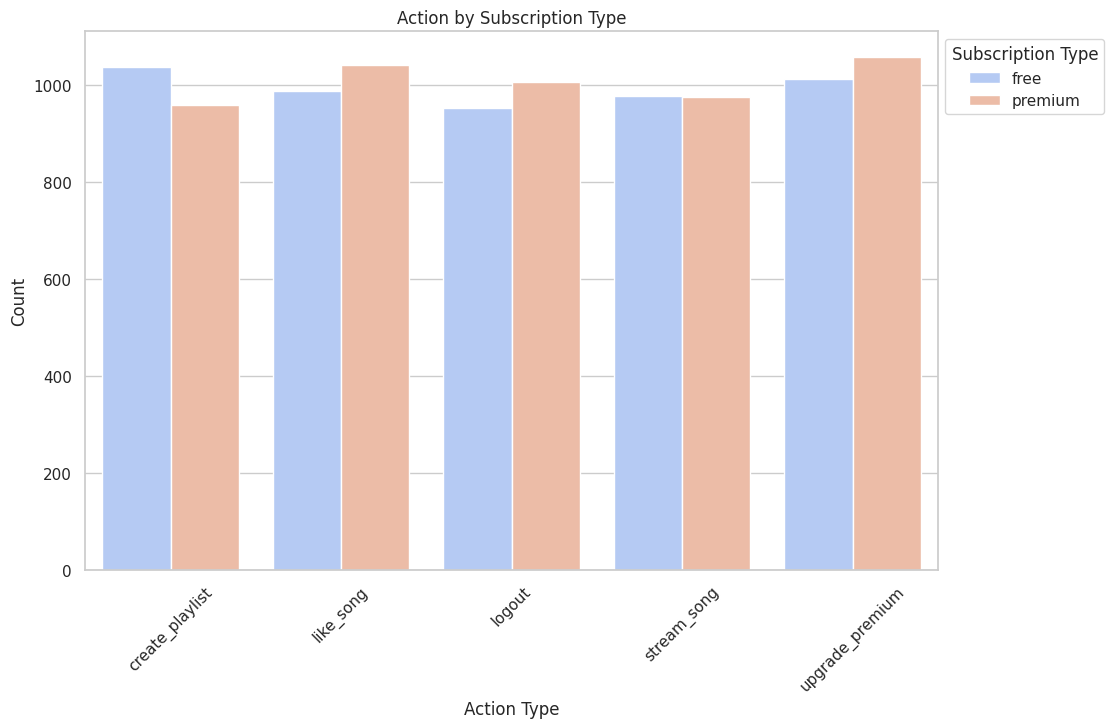

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(11,7))
sns.barplot(data=sub_action_counts,
           x='action',
           y='action_count',
           hue='subscription_type',
           palette='coolwarm')
plt.title('Action by Subscription Type')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

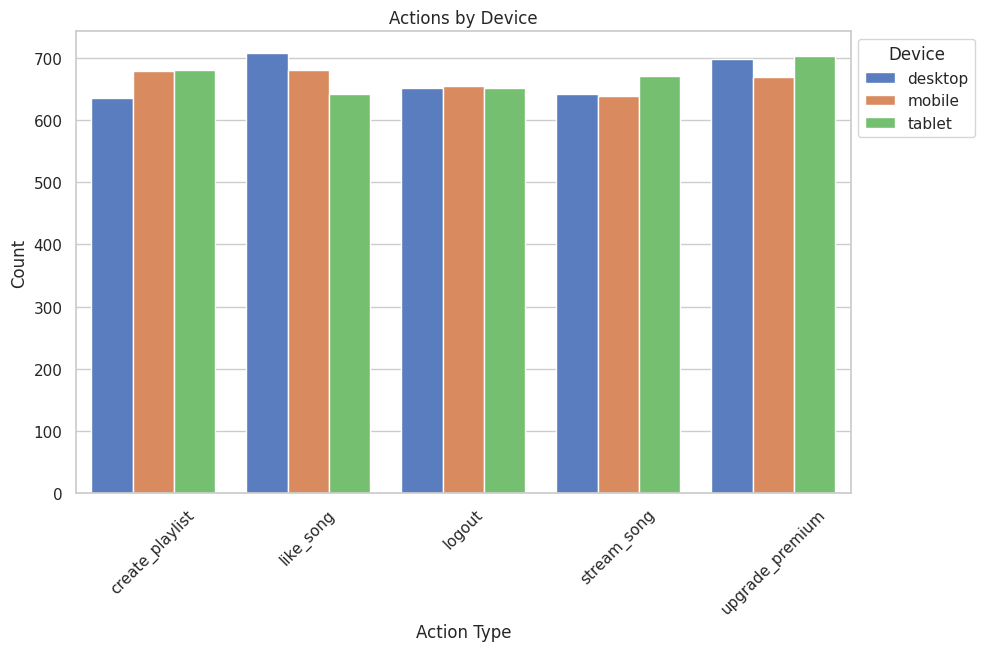

In [ ]:
sns.set_theme(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=device_action_counts,
           x='action',
           y='action_count',
           hue='device',
           palette='muted')

plt.title('Actions by Device')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Device',
         loc='upper left',
         bbox_to_anchor=(1,1))
plt.show()

In [ ]:
pivot_data = device_action_counts.pivot(index='device',
                                       columns='action',
                                       values='action_count').fillna(0)
print(pivot_data)

action   create_playlist  like_song  logout  stream_song  upgrade_premium
device                                                                   
desktop              635        707     651          641              698
mobile               679        680     654          639              669
tablet               681        641     652          671              702


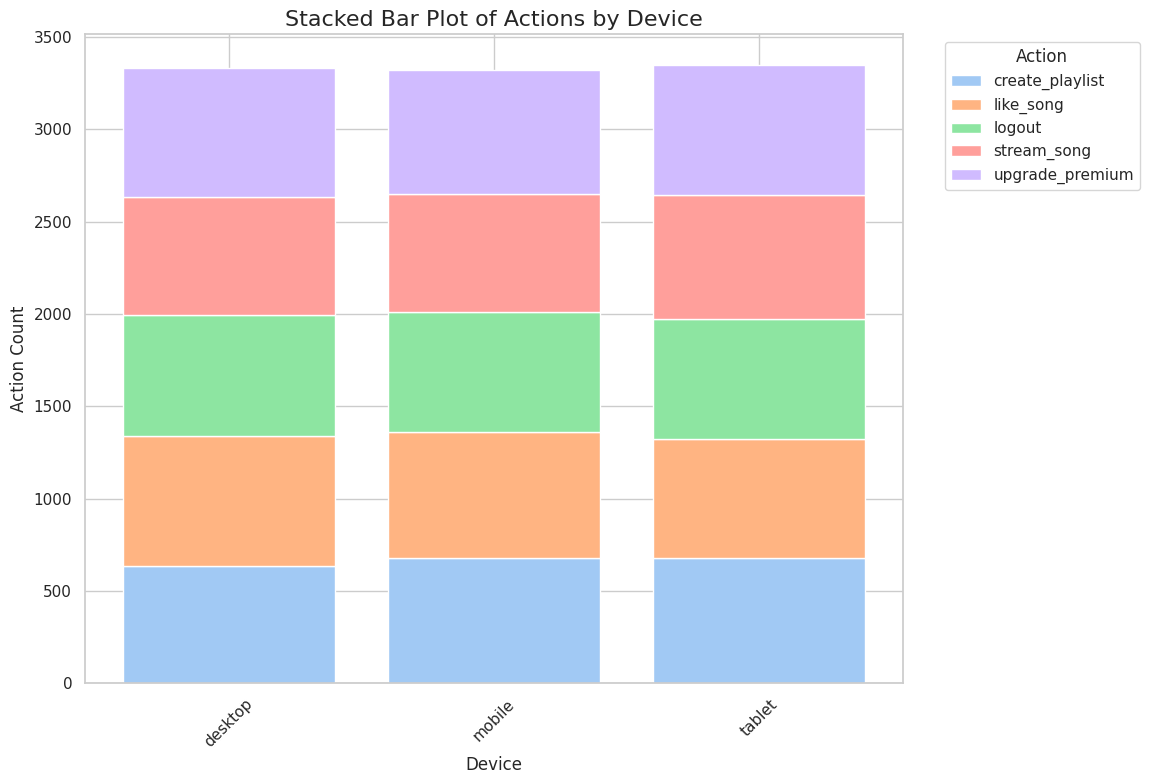

In [ ]:
bar_positions = range(len(pivot_data.index))

plt.figure(figsize=(12,8))
bottom_values = [0] * len(pivot_data.index)
colors = sns.color_palette("pastel", n_colors=len(pivot_data.columns))

for i, action in enumerate(pivot_data.columns):
  plt.bar(bar_positions,
         pivot_data[action],
         bottom=bottom_values,
         label=action,
         color=colors[i % len(colors)])
  bottom_values=[sum(x) for x in zip(bottom_values, pivot_data[action])]


plt.xticks(bar_positions,
         pivot_data.index,
         rotation=45)

plt.title('Stacked Bar Plot of Actions by Device', fontsize=16)
plt.xlabel('Device', fontsize=12)
plt.ylabel('Action Count', fontsize=12)
plt.legend(title='Action',
         loc='upper right',
         bbox_to_anchor=(1.3,1))

plt.tight_layout()

plt.show()



# **Revenue Simulation**

In [ ]:
# Current premium revenue
current_premium_revenue = df_userdata[df_userdata['subscription_type']=='premium']['monthly_revenue']

# Free users count
free_users = df_userdata[df_userdata['subscription_type']=='free']['user_id'].nunique()

In [ ]:
# Simulating half upgrading:
simulation = current_premium_revenue + (free_users / 2) * df_userdata[df_userdata['subscription_type']=='premium']['monthly_revenue'].mean()

print(f"Simulated Total Revenue:{simulation}")

Simulated Total Revenue:0       4975.0
2       4975.0
3       4975.0
4       4975.0
5       4975.0
         ...  
9991    4975.0
9992    4975.0
9993    4975.0
9995    4975.0
9998    4975.0
Name: monthly_revenue, Length: 5034, dtype: float64


# **Simulation (with plotly) **

In [ ]:
# Calculating current total revenue
current_revenue = df_userdata['monthly_revenue'].sum()

In [ ]:
current_premium_revenue = df_userdata[df_userdata['subscription_type']=='premium']['monthly_revenue'].sum()
free_users = df_userdata[df_userdata['subscription_type']=='free']['user_id'].nunique()
simulation = current_premium_revenue + (free_users / 2) * df_userdata[df_userdata['subscription_type']=='premium']['monthly_revenue'].mean()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Current Revenue'],
    y=[current_revenue],
    name='Current Revenue',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=['Simulated Revenue'],
    y=[simulation],
    name='Simulated Revenue',
    marker_color='blue'
))

fig.update_layout(
    title='Comparison of Current vs Simulated Total Revenue',
    xaxis_title='Revenue Type',
    yaxis_title='Total Revenue (€)',
    barmode='group',
    template='plotly_white',
    legend=dict(title='Legend'),
    title_font=dict(size=20)
)

fig.show()

# **What if 75% of free users upgraded ? **

In [ ]:
current_premium_revenue = df_userdata[df_userdata['subscription_type']=='premium']['monthly_revenue'].sum()
free_users = df_userdata[df_userdata['subscription_type']=='free']['user_id'].nunique()

In [ ]:
# 50, 75 and 100% of Free users upgrade
half_upgrade = current_premium_revenue + (free_users / 2) * df_userdata[df_userdata['subscription_type'] == 'premium']['monthly_revenue'].mean()
seventyfive_percent_upgrade = current_premium_revenue + (free_users * 0.75) * df_userdata[df_userdata['subscription_type']=='premium']['monthly_revenue'].mean()
all_upgrade = current_premium_revenue + free_users * df_userdata[df_userdata['subscription_type']=='premium']['monthly_revenue'].mean()

revenue_scenarios = {
    "Current premimu Revenue": current_premium_revenue,
    "50% Free users Upgrade": half_upgrade,
    "75% Free users Upgarde": seventyfive_percent_upgrade,
    "100% Free users Upgrade": all_upgrade
}

In [ ]:
fig= go.Figure()

fig.add_trace(go.Bar(
    x=list(revenue_scenarios.keys()),
    y=list(revenue_scenarios.values()),
    marker=dict(color=['#1f77b4', '#ff7f0e', '#2ca02c','#d62728']),
    text=[f"€{val:,.2f}" for val in revenue_scenarios.values()],
    textposition='auto'
))

fig.update_layout(
    title='Simulated Revenue Scenarios',
    xaxis_title="Scenario",
    yaxis_title="Total Revenue (EUR)",
    template="plotly_white",
    title_font_size=16
)

fig.show()